## PHASE 4 PROJECT
### Restaurant Recommender System

In [46]:
# Import necessary libraries
import pandas as pd
import collections
import folium
import json 
import string
import pickle
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from surprise import Reader , Dataset
from tabulate import tabulate
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.filterwarnings('ignore')

In [47]:
# Extract the 10000 reviews dataset
import zipfile

with zipfile.ZipFile('archive (5).zip', 'r') as zip_ref:
    zip_ref.extractall('./data')  # Extract to a directory named 'data'

In [48]:
df1 = pd.read_csv("data/Restaurant reviews.csv")
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [50]:

df2 = pd.read_csv(r"C:\Users\USER PC\Downloads\restaurants.csv", encoding='latin1')
df2

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
52282,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ""'free'"", 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
52283,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
52284,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       51843 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52265 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720 non-null  object 
 12  categories    52286 non-null  object 
 13  hours         45007 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB


### Rename column
Renaming the name column into restaurant column for better understanding.

In [52]:
df2.rename(columns={'name':'Restaurant', 'stars':'b/s rating'}, inplace=True)

In [53]:
# MERGE the two datasets into one using the Restaurant primary key
data = pd.merge(df1 , df2 , on='Restaurant', how='inner')

# preview merged data
data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,business_id,address,...,state,postal_code,latitude,longitude,b/s rating,review_count,is_open,attributes,categories,hours
0,KFC,Kirthi Kirthi,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0,NaN,yFqq66GxRjnhZXPgjA6hnw,716 Adams Ave,...,PA,19124,40.031578,-75.104787,2.0,7,1,"{'OutdoorSeating': 'False', 'WiFi': ""'free'"", ...","Restaurants, Chicken Shop, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
1,KFC,Kirthi Kirthi,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0,NaN,0xe81EigRw_b5W8tg0Ca6Q,8242 Little Rd,...,FL,34654,28.277165,-82.673909,1.5,19,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Fast Food, Chicken Wings, Restaurants, Chicken...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
2,KFC,Kirthi Kirthi,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0,NaN,nqzOH_1CBGe2VrsxTziuvg,430 S 15th St,...,MO,63103,38.624900,-90.203600,1.5,5,0,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Chicken Shop, Chicken Wings, Fast Food, Restau...",NaN
3,KFC,Kirthi Kirthi,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0,NaN,a8Q2bvUW6mAiws7xW7cS6g,104 N Pottstown Pike,...,PA,19341,40.028822,-75.629475,1.5,45,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
4,KFC,Kirthi Kirthi,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0,NaN,rZZ6gtsqBVkpSLoZ9EZ_1A,3144 Tampa Rd,...,FL,34677,28.049435,-82.699040,1.5,28,0,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Chicken Wings, Chicken Shop, Restaurants, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ..."


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47200 entries, 0 to 47199
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    47200 non-null  object 
 1   Reviewer      47200 non-null  object 
 2   Review        46905 non-null  object 
 3   Rating        47200 non-null  object 
 4   Metadata      47200 non-null  object 
 5   Time          47200 non-null  object 
 6   Pictures      47200 non-null  int64  
 7   7514          0 non-null      float64
 8   business_id   47200 non-null  object 
 9   address       47200 non-null  object 
 10  city          47200 non-null  object 
 11  state         47200 non-null  object 
 12  postal_code   47200 non-null  object 
 13  latitude      47200 non-null  float64
 14  longitude     47200 non-null  float64
 15  b/s rating    47200 non-null  float64
 16  review_count  47200 non-null  int64  
 17  is_open       47200 non-null  int64  
 18  attributes    47000 non-nu

## Data Preparation
In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;

* Checking Dealing with missing data
* Checking and removing duplicates
* Feature Engineering
* Selecting the Relevant Columns
* Dropping Irrelevant columns
* Selecting relevant rows


## Dealing with missing data
Missing values can lead to gaps in your dataset, making it incomplete and potentially unreliable for analysis. By addressing missing values, you ensure that you have a more comprehensive dataset to work with.

In [55]:
# checking for columns with missing values
data.isna().sum()

Restaurant          0
Reviewer            0
Review            295
Rating              0
Metadata            0
Time                0
Pictures            0
7514            47200
business_id         0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
b/s rating          0
review_count        0
is_open             0
attributes        200
categories          0
hours             500
dtype: int64

 Therefore, since the columns that have missing values only provide metadata/ more information about our restaurants i.e attribute, hours, 7514 , Review then we will impute the missing values with "Not-Available" since they won't influence our analysis

In [56]:
# Imputing missing values in the hours column with "Not-Available" 
data.hours.fillna(value="Not-Available", inplace=True)

In [57]:
# Imputing missing values in the attributes column with "Not-Available" 
data.attributes.fillna(value="Not-Available", inplace=True)

In [58]:
# Imputing missing values in the attributes column with "Not-Available" 
data.Review.fillna(value="Not-Available", inplace=True)

In [59]:
data.isna().sum()

Restaurant          0
Reviewer            0
Review              0
Rating              0
Metadata            0
Time                0
Pictures            0
7514            47200
business_id         0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
b/s rating          0
review_count        0
is_open             0
attributes          0
categories          0
hours               0
dtype: int64

## Drop Irrelavant columns
The columns is_open, postal_code, Reviewer, 7514, Pictures are not informative in our analysis and will not be used during analysis, therefore we drop them.


In [60]:
# drop column '7514' as it has too many misssing values.
# drop other unnecessary columns
data.drop(columns=['Pictures', '7514', 'postal_code', 'Reviewer', 'is_open'], inplace=True)



In [61]:
# previewing our changes
data.isna().sum()

Restaurant      0
Review          0
Rating          0
Metadata        0
Time            0
business_id     0
address         0
city            0
state           0
latitude        0
longitude       0
b/s rating      0
review_count    0
attributes      0
categories      0
hours           0
dtype: int64

## Dealing with Duplicates

In order to avoid inaccurate insights we have to deal with duplicate data because duplicate data can lead to incorrect or misleading insights.

In [62]:
# checking for duplicated columns
print("Duplicates: ", data.duplicated().sum())

Duplicates:  0


Our data has no duplicates

## Feature Engineering
In feature engineering, we will combine the city, state, address columns to form one column, location column with the intention of performing geospatial analysis or visualization. Having a unified location column simplifies the process and you can use the location column directly to create maps or explore geographic trend.

In [63]:
# combining the address columns
data['location']=data[['city','state','address']]\
            .apply( lambda x: f"State:{x['state']}, City:{x['city']}, Address:{x['address']} ", axis=1)

# then we drop the combined columns
data.drop(columns=['state', 'city','address'], axis=1, inplace=True)

data.location

0        State:PA, City:Philadelphia, Address:716 Adams...
1        State:FL, City:New Port Richey, Address:8242 L...
2        State:MO, City:Saint Louis, Address:430 S 15th...
3        State:PA, City:Exton, Address:104 N Pottstown ...
4           State:FL, City:Oldsmar, Address:3144 Tampa Rd 
                               ...                        
47195    State:IN, City:Indianapolis, Address:125 S Pen...
47196      State:PA, City:Philadelphia, Address:Holme Cir 
47197    State:LA, City:New Orleans, Address:857 Terry ...
47198    State:FL, City:North Redington Beach, Address:...
47199    State:PA, City:Huntingdon Valley, Address:Beth...
Name: location, Length: 47200, dtype: object

In [64]:
data.head()

,Restaurant,Review,Rating,Metadata,Time,business_id,latitude,longitude,b/s rating,review_count,attributes,categories,hours,location
0,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,yFqq66GxRjnhZXPgjA6hnw,40.031578,-75.104787,2.0,7,"{'OutdoorSeating': 'False', 'WiFi': ""'free'"", ...","Restaurants, Chicken Shop, Fast Food, Chicken ...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State:PA, City:Philadelphia, Address:716 Adams..."
1,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,0xe81EigRw_b5W8tg0Ca6Q,28.277165,-82.673909,1.5,19,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Fast Food, Chicken Wings, Restaurants, Chicken...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:...","State:FL, City:New Port Richey, Address:8242 L..."
2,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,nqzOH_1CBGe2VrsxTziuvg,38.624900,-90.203600,1.5,5,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Chicken Shop, Chicken Wings, Fast Food, Restau...",Not-Available,"State:MO, City:Saint Louis, Address:430 S 15th..."
3,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,a8Q2bvUW6mAiws7xW7cS6g,40.028822,-75.629475,1.5,45,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Restaurants, Fast Food, Chicken Wings, Chicken...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'...","State:PA, City:Exton, Address:104 N Pottstown ..."
4,KFC,Good atmosphere to eat with relax.tastes good....,4,"10 Reviews , 1 Follower",5/22/2019 17:21,rZZ6gtsqBVkpSLoZ9EZ_1A,28.049435,-82.699040,1.5,28,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Chicken Wings, Chicken Shop, Restaurants, Fast...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...","State:FL, City:Oldsmar, Address:3144 Tampa Rd"


In [65]:
data.shape

(47200, 14)

### Data splitting

In [66]:
# selecting only the restaurants
data=data.loc[ data.categories.str.contains('Restaurants')].copy().reset_index(drop=True)
data.shape

(47200, 14)

# Performing Exploratory Data Analysis

In [67]:
# Convert to numeric
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')  
data['b/s rating'] = pd.to_numeric(data['b/s rating'], errors='coerce')  

# Check the data types after conversion
print(data.dtypes)


Restaurant       object
Review           object
Rating          float64
Metadata         object
Time             object
business_id      object
latitude        float64
longitude       float64
b/s rating      float64
review_count      int64
attributes       object
categories       object
hours            object
location         object
dtype: object


In [68]:
data.describe()

,Rating,latitude,longitude,b/s rating,review_count
count,47200.000000,47200.000000,47200.000000,47200.000000,47200.000000
mean,3.003114,36.706016,-88.245119,2.128178,19.677966
std,1.763256,5.473664,12.906622,0.657421,14.864448
min,1.000000,27.713598,-119.882656,1.000000,5.000000
25%,1.000000,32.217255,-90.268392,1.500000,11.000000
50%,3.000000,38.684696,-86.239720,2.000000,15.000000
75%,5.000000,39.928818,-75.655039,2.500000,24.250000
max,5.000000,53.629038,-74.729721,4.500000,131.000000


## Distribution of Ratings

We are going to compare the distribution of user ratings and business ratings in the dataset. 

What do these differences indicate about our user preference?

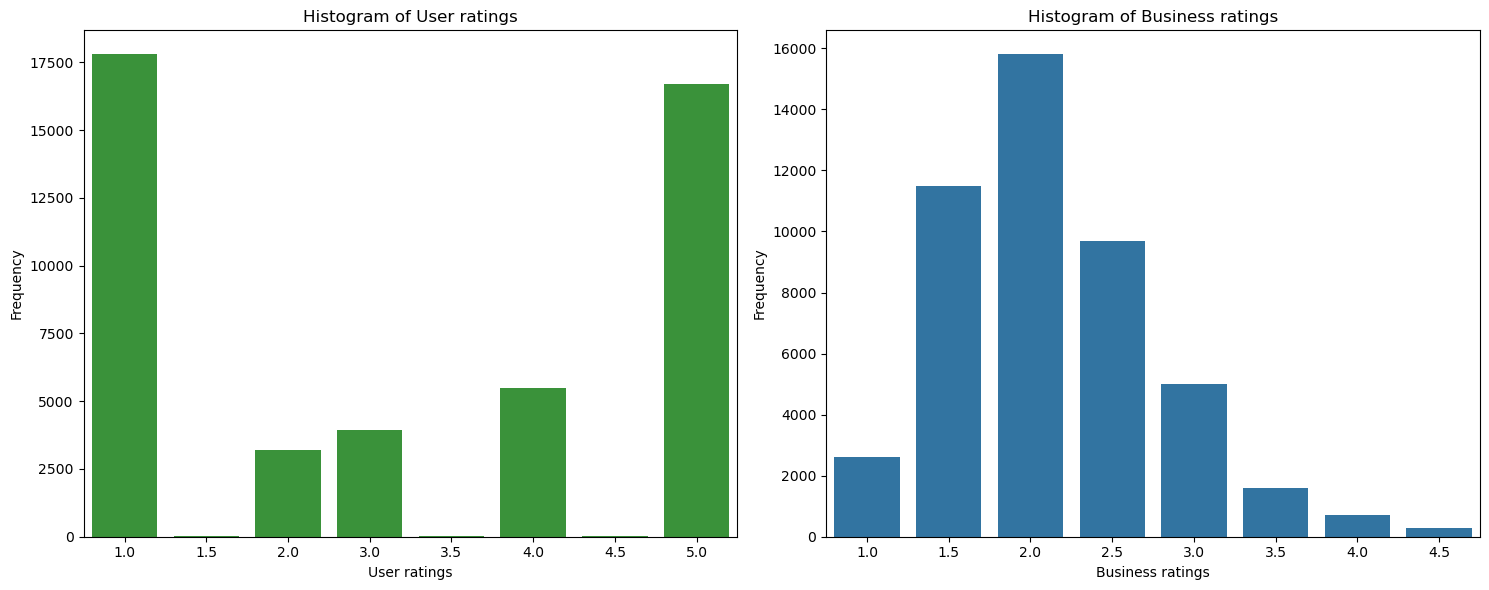

In [69]:
# assign variables
col1 = 'Rating'
col2 = 'b/s rating'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Create histograms for col1 and col2
sns.countplot(data=data , x=col1 , ax=axes[0] , color='tab:green')

# adjust the number of bins
axes[0].set_xlabel("User ratings")
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of User ratings')

sns.countplot(data=data, x=col2 ,ax=axes[1] ,color='tab:blue')
  # Adjust the number of bins as needed
axes[1].set_xlabel("Business ratings")
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of Business ratings')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




In [70]:
df_1 = data[['Rating', 'b/s rating', 'review_count']]
df_1.corr()

,Rating,b/s rating,review_count
Rating,1.000000,0.020149,0.008556
b/s rating,0.020149,1.000000,-0.182122
review_count,0.008556,-0.182122,1.000000


### Correlation between Rating and B/S Rating

The correlation coefficient between the Rating and B/S Rating is approximately 0.02, which indicates a very weak positive relationship. This means that there is a slight tendency for businesses with higher ratings to also have higher B/S ratings, but the relationship is not strong.

In practical terms, this correlation suggests that improving a business's rating may not necessarily lead to a significant increase in its B/S rating.

### Correlation between Rating and Review Count

The correlation coefficient between the Rating and Review Count is approximately 0.01, which indicates a very weak positive relationship. This means that there is a slight tendency for businesses with more reviews to also have higher ratings, but the relationship is not strong.

In practical terms, this correlation suggests that having more reviews does not necessarily guarantee a higher rating. There may be other factors at play, such as the quality of the reviews or the overall customer experience, that influence the rating more significantly

### Correlation between B/S Rating and Review Count

The correlation coefficient between the B/S Rating and Review Count is approximately -0.18, which indicates a weak negative relationship. This means that there is a tendency for businesses with more reviews to have lower B/S ratings, but the relationship is not strong.

In practical terms, this correlation suggests that having more reviews may not necessarily be beneficial for a business's B/S rating. It's possible that businesses with more reviews may be more likely to have a mix of positive and negative reviews, which could bring down their overall B/S rating. Alternatively, businesses with fewer reviews may have a higher proportion of positive reviews, which could boost their B/S rating.

## Distribution of Resturants

### 1. Cities

What are the most frequently occurring cities and how does the distribution of restaurants in these cities impact users' choices of restaurants?

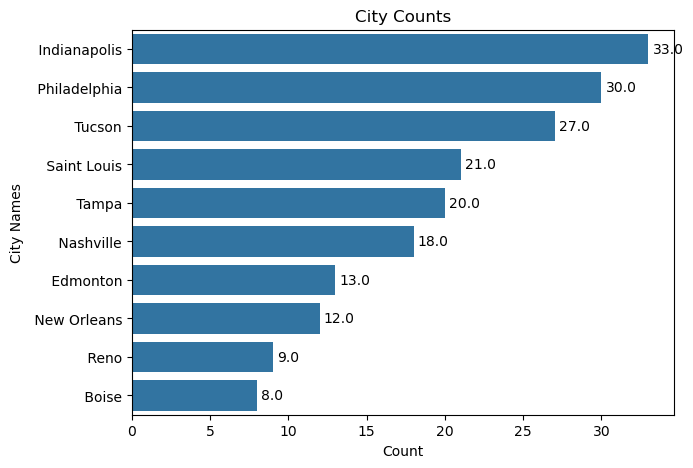

In [71]:
# extract the location column and drop duplicate business entries
location= data.drop_duplicates('business_id')[['location']]
# split the location string to extract the city part, removing city from each entry
city=location.location.apply(lambda x: x.split(',')[1].replace("City:",'')) 
# count the occurrences of each city and selected the top 10 cities
city=collections.Counter(city)
city=city.most_common(10)
# extract the city names and their respective counts
y=[i[0] for i in city]
x=[i[1] for i in city]
# created a barplot to visualize the city counts
fig, ax=plt.subplots(figsize=(7,5))
sns.barplot( y=y, x=x, color='tab:blue')
ax.set_ylabel("City Names")
ax.set_xlabel("Count")
ax.set_title("City Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

### Key Findings:

Indianapolis and Philadelphia are the most frequently occurring cities, with 33 and 30 restaurants respectively. This suggests higher restaurant density and potentially more diverse dining options for users in these cities.
Tucson follows closely with 27 restaurants, indicating a significant restaurant presence as well.
The remaining cities have fewer restaurants, ranging from 21 in Saint Louis to 8 in Boise.
Impact on User Choice:

The distribution of restaurants significantly influences user choices:

More Options: Users in cities with higher restaurant counts (Indianapolis, Philadelphia, Tucson) have more options to choose from, potentially leading to more specific preferences and greater satisfaction.
Variety and Competition: A larger number of restaurants often translates to a wider variety of cuisines and price points. This competition can drive restaurants to maintain high quality and competitive pricing.
Limited Choices: Conversely, users in cities with fewer restaurants (Boise, Reno, etc.) face more limited choices, potentially impacting their ability to find options that perfectly suit their tastes or dietary needs.

The graph highlights how the distribution of restaurants across cities can shape users' dining experiences. Cities with a higher concentration of restaurants provide more diverse options and potentially better value, while users in cities with fewer restaurants might face more constraints in their choices.

### 2. States

What are the most common states and how does the distribution of restaurants across these states impact the types of cuisine available and user preferences for dining?

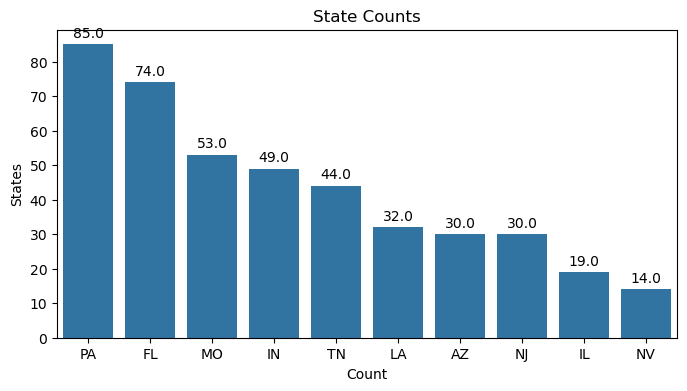

In [72]:
# extract the location column and split it to obtain the state part
states=location.location.apply(lambda x: x.split(',')[0].replace("State:",'')) 
# count the occurrences of each state and select the top 10 states
states=collections.Counter(states)
states=states.most_common(10)
# extract the state names and their respective counts for visualization
y=[i[0] for i in states]
x=[i[1] for i in states]
# created a barplot to visualize the state counts
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot( y=x,x=y , color='tab:blue')
ax.set_ylabel("States")
ax.set_xlabel("Count")
ax.set_title("State Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

Most Common States: Pennsylvania (PA) leads with a significant margin, followed by Florida (FL), Missouri (MO), and Indiana (IN). These four states likely dominate the dataset.

Impact on Cuisine & Preferences: The distribution of restaurants across these states likely shapes both cuisine availability and user preferences in these ways:

Diversity of Cuisine: States with larger numbers of restaurants likely offer a wider variety of cuisines. Pennsylvania, for example, might have a broader range compared to Nevada (NV).

Regional Specialties: The concentration of restaurants in certain states might indicate a prevalence of specific regional cuisines. Florida might have more seafood, while Missouri could be known for barbecue.

User Exposure & Preference: People living in states with a higher concentration of particular cuisines may develop a stronger preference for those cuisines. For instance, users in Pennsylvania might order a different type of food compared to users in Illinois.

## Popular Restaurants

Analyzing and highlighting the most popular restaurants is essential because it allows us to recognize the establishments that have garnered significant attention and interest from customers. This information will be valuable for consumers seeking highly-rated dining experiences.

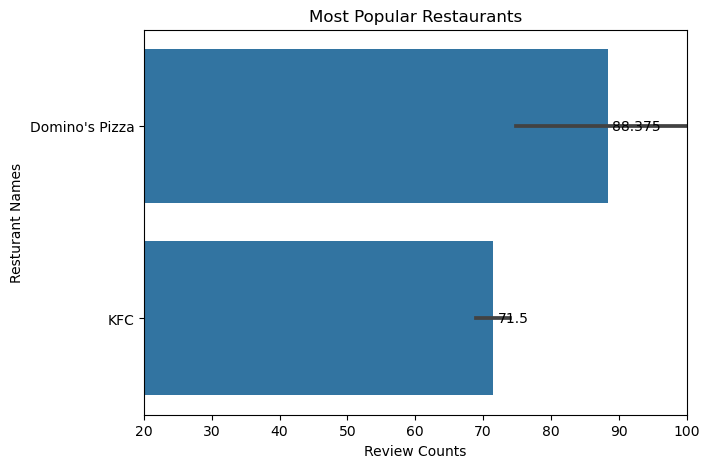

In [73]:
# most popular restaurants

index=data.drop_duplicates(subset='business_id').sort_values(by=['review_count','b/s rating'],ascending=False)[:10].index

fig, ax=plt.subplots(figsize=(7,5))
sns.barplot(data=data.loc[index], x="review_count", y='Restaurant', color='tab:blue')
ax.set_ylabel("Resturant Names")
ax.set_xlabel("Review Counts")
ax.set_xlim([20,100])
ax.set_title("Most Popular Restaurants");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The provided bar graph illustrates the review counts of two popular restaurants: Domino's Pizza and KFC.

##### Findings:
Domino's Pizza emerges as the more popular choice, boasting a significantly higher review count of 88.375. This suggests a larger customer base and greater engagement compared to KFC.

KFC, while still receiving a substantial number of reviews, lags behind with 71.5 reviews.

##### Possible interpretations:
Wider reach: Domino's Pizza might have a more extensive delivery network or a stronger online presence, contributing to its higher review count.

Menu preference: Consumers might generally favor Domino's Pizza's menu offerings over KFC's.

Price point: Domino's Pizza's pricing strategy could be more appealing to a broader customer base, leading to more frequent purchases and subsequent reviews.

It's essential to acknowledge that this data solely represents review counts and doesn't necessarily reflect the overall quality, service, or dining experience at each restaurant. Other factors, such as marketing campaigns or customer loyalty programs, could also influence review counts.





## Distribution of Categories

What are the most prevalent restaurant categories and how does the distribution of these categories impact the restaurant landscape in terms of user preferences and choices?

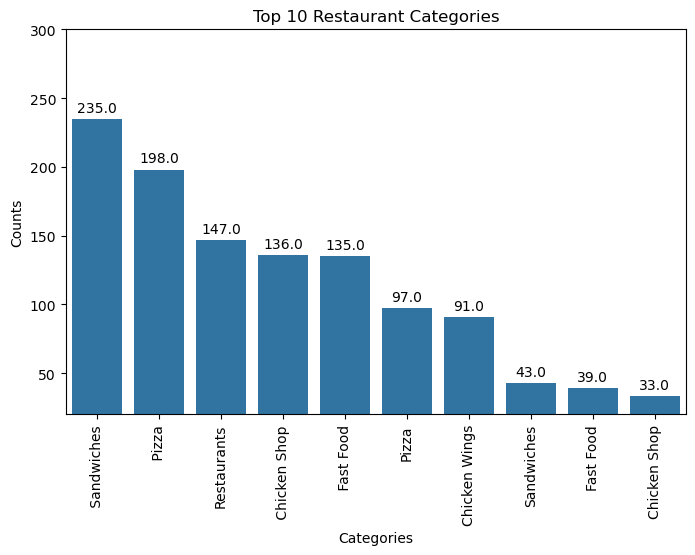

In [74]:

# list of all categories
categories=[ cat for category in data.drop_duplicates('business_id').categories for cat in category.split(',')]

# list of unique categories only
categories=collections.Counter(categories)

#picking the top 20 categories
common=categories.most_common(12)

# ploting
fig, ax=plt.subplots(figsize=(8,5))
x=[ i[0] for i in common[2:]]
y=[i[1] for i in common[2:]]
sns.barplot(x=x, y=y, color='tab:blue', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
ax.set_ylim([20,300])
ax.set_title("Top 10 Restaurant Categories");
ax.bar_label( ax.containers[0], padding=3, fmt='{:,}');


Impact on Restaurant Landscape

The distribution of categories has a significant impact on the restaurant landscape in terms of user preferences and choices:

Dominance of Sandwiches and Pizza: The high frequency of sandwiches and pizza indicates a strong demand for these categories, making them staples in the restaurant industry.

Variety of Options: The presence of multiple categories, including restaurants, chicken shops, fast food, and chicken wings, provides users with a range of options to suit their tastes and preferences.

Competition and Differentiation: The distribution of categories creates a competitive environment, where restaurants must differentiate themselves to stand out and attract customers. This drives innovation, quality, and diversity in the industry.

User Preferences: The popularity of certain categories, such as sandwiches and pizza, suggests that users have a strong affinity for these types of restaurants. This insight can inform restaurant owners and marketers when targeting their audience.

Market Trends: The distribution of categories may indicate emerging trends or shifts in consumer preferences. For example, the rise of fast food or chicken shops could signal a growing demand for convenient, affordable dining options.

In conclusion, the distribution of restaurant categories has a profound impact on the restaurant landscape, influencing user preferences, competition, and innovation. By understanding these trends, restaurant owners, marketers, and industry professionals can make informed decisions to stay competitive and meet the evolving needs of their customers.



## Review Word Cloud Analysis
To create a word cloud visualization that highlights the most frequent words found in review texts column. By filtering and analyzing the text of positive reviews, the word cloud offers an intuitive and visually appealing way to identify the key themes and frequently mentioned aspects that contribute to a positive customer experience. This visualization provides valuable insights into the factors that most positively influence customer satisfaction, aiding in the understanding of what makes certain businesses successful and well-reviewed on Yelp

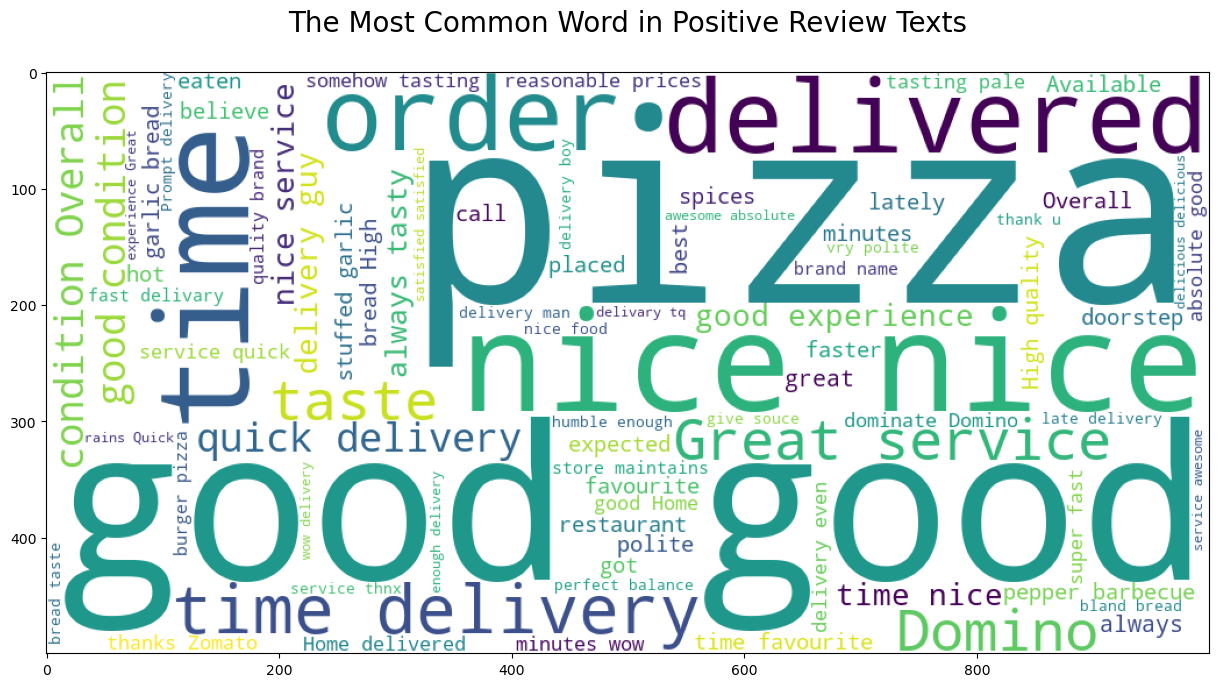

In [75]:
# creating a word count plot for the positive reviews

# selecting only positive reviews is reviews with 4 and above ratings
df=data.loc[ (data['Rating']>=4)& (data['b/s rating']>=4)] 

# creating the plot figure
plt.figure(figsize=(15,15))            

plt.title('The Most Common Word in Positive Review Texts\n', fontsize=20)  # setting plot title

# creating the plot on only the most 200 words and setting the plot size
wc = WordCloud(max_words=200, min_font_size=10,height=500,width=1000,background_color="white")\
        .generate(' '.join(df['Review'])) #create a WordCloud using the text review column

plt.imshow(wc);

The word cloud visually represents the most common words found in the positive review texts, where the size of each word in the cloud corresponds to its frequency in the reviews. This provides an overview of the key terms and themes in positive reviews.

Therefore from the plot above, the most occurring words in the positive reviews are words like; 



To create a word cloud visualization that highlights the most frequently occurring words in negative review texts from the Yelp dataset. By filtering and analyzing the text of negative reviews, the word cloud offers a visual representation of the common themes and frequently mentioned issues that contribute to a negative customer experience.

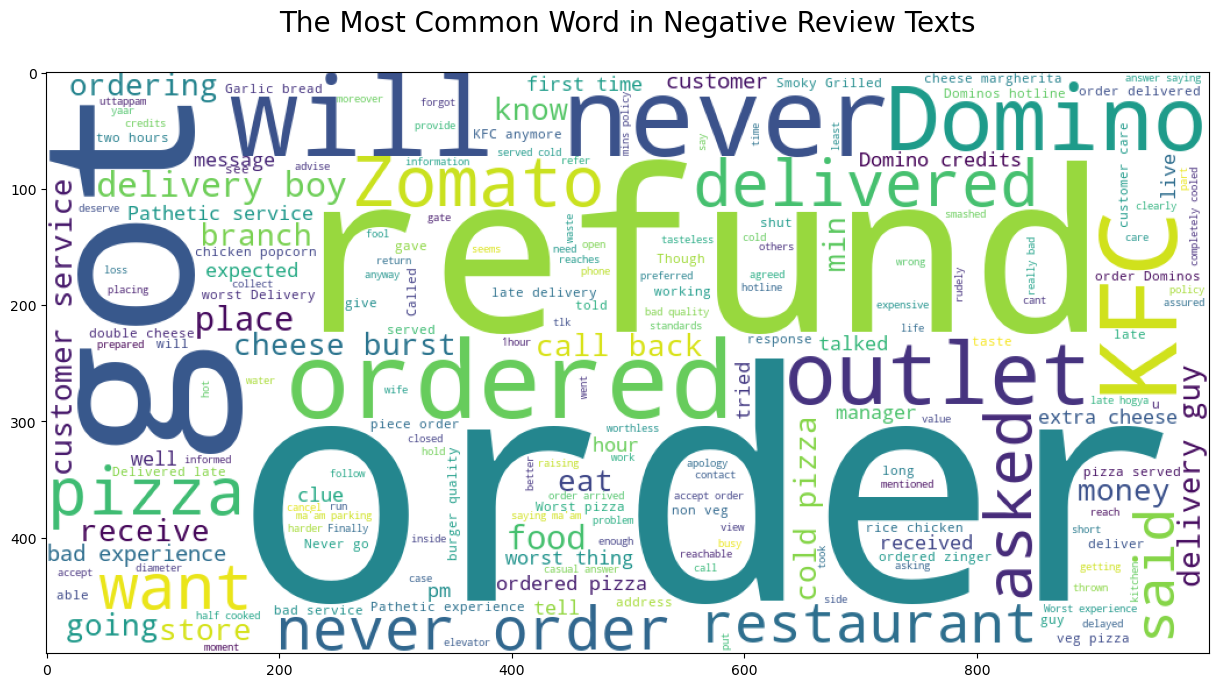

In [76]:
# creating a word count plot for the positive reviews

# selecting only negative reviews i.e reviews with 2 and below ratings
df=data.loc[ (data['Rating']<=2)& (data['b/s rating']<=2)]
plt.figure(figsize=(15,15))

# creating the plot figure
plt.title('The Most Common Word in Negative Review Texts\n', fontsize=20)


# creating the plot on only the most 200 words and setting the plot size
wc = WordCloud(max_words=200,height=500,width=1000,background_color="white")\
        .generate(' '.join(df['Review']))    #create a WordCloud using the text review column

plt.imshow(wc);

This visualization provides valuable insights into the factors that may lead to poor reviews, helping to identify areas of improvement for businesses and assisting in understanding the aspects that negatively impact customer satisfaction on Yelp.

Therefore from the plot above, the most occurring words in the negative reviews are words like, minute , food, place , ordered, pizza, terrible, time, service, said ..etc, these words are attributed to dissatisfied customers and issuance of bad /poor ratings to restaurants. When such words are encountered there should be further investigation of the business service delivery for improvements


## Interactive Map Visualization with Folium

The idea is to write a code that generates an interactive map using Folium, a Python library for creating leaflet maps. The map is centered at a specific latitude and longitude, which is determined by the first entry in the dataset. It then proceeds to populate the map with markers for selected businesses.

In [77]:
# Set up center latitude and longitude
center_lat = data['latitude'][0]
center_long = data['longitude'][0]

# Initialize map with center lat and long
map_ =folium.Map([center_lat,center_long], zoom_start=5)

# Adjust this limit to see more or fewer businesses
limit=1000

for index in range(limit):
    # Extract information about business
    lat = data.loc[index,'latitude']
    long = data.loc[index,'longitude']
    name = data.loc[index,'Restaurant']
    rating = data.loc[index,'b/s rating']
    location = data.loc[index,'location']
    details = "{}\nStars: {} {}".format(name,rating,location)
    
    # Create popup with relevant details
    popup = folium.Popup(details,parse_html=True)
    
    # Create marker with relevant lat/long and popup
    marker = folium.Marker(location=[lat,long], popup=popup)
    
    marker.add_to(map_)
    
map_

### Insights and Findings:

Geographical Distribution: The map provides a visual representation of the geographical distribution of businesses across the region, highlighting areas with higher concentrations of restaurants.

Rating Patterns: By examining the ratings associated with each marker, users can identify patterns or trends in the quality of service provided by restaurants in different areas.

Location-Based Insights: The inclusion of location information in the popups enables users to understand how the location of a restaurant might impact its rating or popularity.

Interactive Exploration: The interactive nature of the map allows users to zoom in and out, explore different regions, and gain a deeper understanding of the restaurant landscape in the area.